# Airbnb Home Prices Prediction 

## 1.1 Introduction

Dự đoán giá thuê của các ngôi nhà khác nhau dựa trên các loại neighbourhoood, longitute, latitute và loại phòng (room type) thực sự có thể giúp chủ nhà đúng mức giá trong khi đảm bảo rằng có lợi nhuận tối đa. Trong vấn đề machine learning này, chúng ta sẽ xem xét các yếu tố khác nhau ảnh hưởng đến nhu cầu của các ngôi nhà. Hơn nữa, chúng ta sẽ dùng các features này để đưa ra dự đoán về giá tối ưu cho các ngôi nhà. 

## 1.2 Metrics
1. Mean Squared Error (MSE)

2. Mean Absolute Error (MAE)


## 1.3 Source

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data


## Reading the libraries


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd     
import matplotlib.pyplot as plt  
import warnings            
warnings.filterwarnings("ignore")

Reading data.

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

Mô tả dữ liệu về các giá trị như giá trị minimum, các giá trị maximum cùng với độ lệch chuẩn cho các features số.

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Missingno
Các đường màu trắng bên dưới biểu thị các giá trị bị thiếu và đường tối cho mỗi cột cho biết các giá trị có mặt

In [7]:
## Reading the missingno 
import missingno as msno

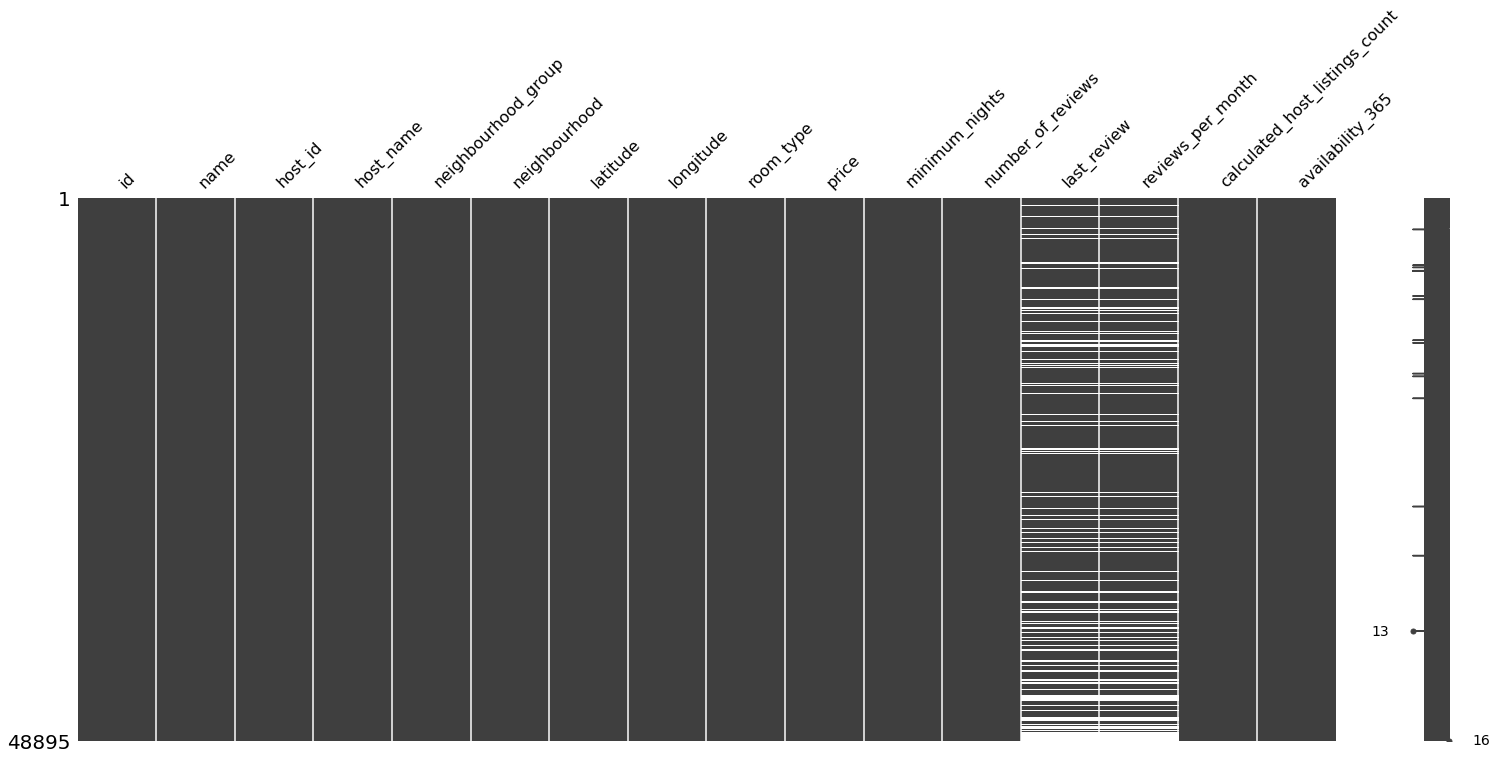

In [8]:
msno.matrix(df)
plt.show()

Chúng ta thấy rằng có các giá trị bị thiếu trong cột last_review

In [9]:
df['last_review'][0: 10]

0    2018-10-19
1    2019-05-21
2           NaN
3    2019-07-05
4    2018-11-19
5    2019-06-22
6    2017-10-05
7    2019-06-24
8    2017-07-21
9    2019-06-09
Name: last_review, dtype: object

Chúng ta cũng thấy rằng có những giá trị bị thiếu trong cột 'Review_per_month'.

In [10]:
df['reviews_per_month'][0: 10]

0    0.21
1    0.38
2     NaN
3    4.64
4    0.10
5    0.59
6    0.40
7    3.47
8    0.99
9    1.33
Name: reviews_per_month, dtype: float64

Tương tự, chúng ta sẽ xem các host names, đếm tổng số giá trị và kiểm tra các tên phổ biến nhất.

In [11]:
df['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [12]:
df['host_name'].value_counts().index[0: 20]

Index(['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex', 'Blueground',
       'Sarah', 'Daniel', 'Jessica', 'Maria', 'Mike', 'Andrew', 'Anna',
       'Chris', 'Laura', 'Melissa', 'Emily', 'Jennifer', 'James', 'Rachel'],
      dtype='object')

In [13]:
df['host_name'].value_counts().values[0: 20]

array([417, 403, 327, 294, 279, 232, 227, 226, 205, 204, 194, 190, 187,
       182, 182, 160, 157, 154, 151, 146])

In [14]:
def barplot_function(x_value, y_value, data = None, palette = 'viridis'):
    plt.figure(figsize = (10, 10))
    if data:
        sns.barplot(x = x_value, y = y_value, data = data, palette = palette)
    else:
        sns.barplot(x = x_value, y = y_value, data = data, palette = palette)
    plt.show()

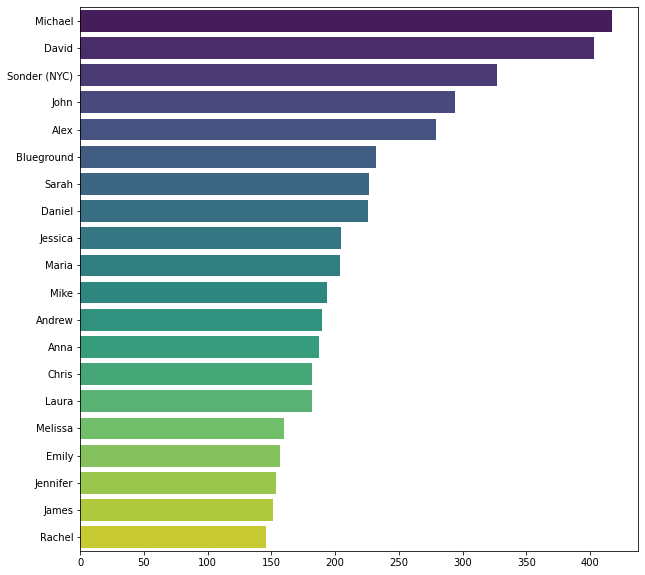

In [15]:
barplot_function(x_value = df['host_name'].value_counts().values[0: 20], y_value = df['host_name'].value_counts().index[0: 20])

In [16]:
print(" Tổng số hosts khác nhau là : {}".format(len(df['host_id'].unique())))

 Tổng số hosts khác nhau là : 37457


In [17]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [18]:
def boxplot_function(dataframe, x_value, y_value, title_size = 15, label_size = 10, figsize = (15, 10), palette = "green"):
    plt.figure(figsize = (figsize))
    sns.boxplot(x = x_value, data = dataframe, palette = palette)


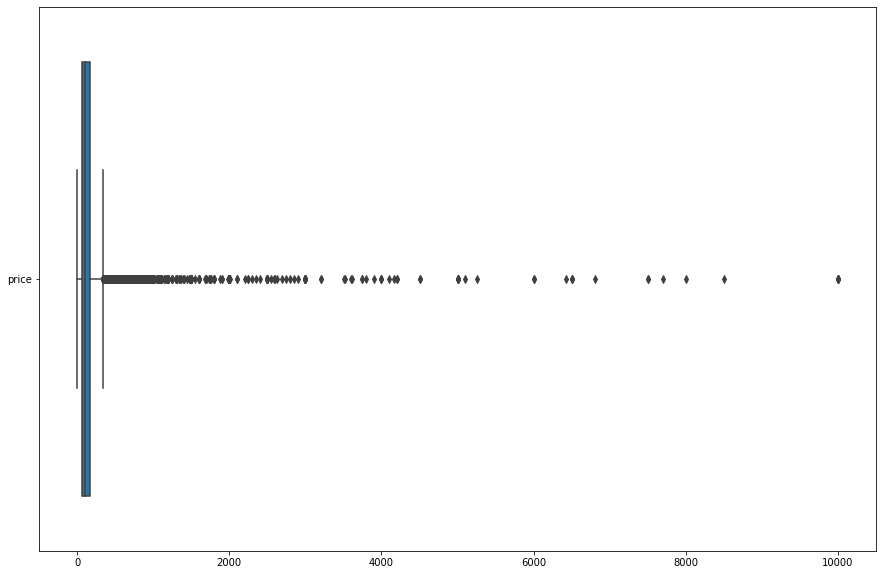

In [19]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = df[["price"]],orient='h')
plt.show()

In [20]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [21]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

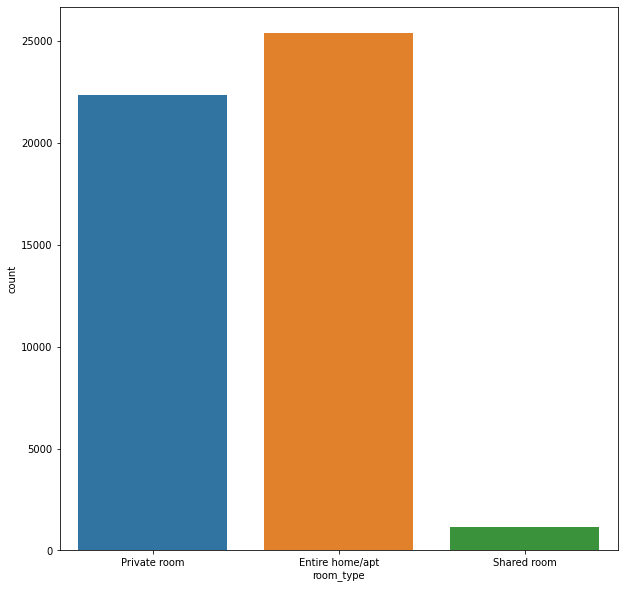

In [22]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'room_type', data = df)
plt.show()

Chúng ta cũng có thể tìm hiểu các tên thường xảy ra của các ngôi nhà và số lần xuất hiện của chúng trong bộ dữ liệu.

In [23]:
df['name'].value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

value_counts host_id là một cách tốt để xác định các host có mặt trong dữ liệu như có thể thấy dưới đây.

In [24]:
df['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

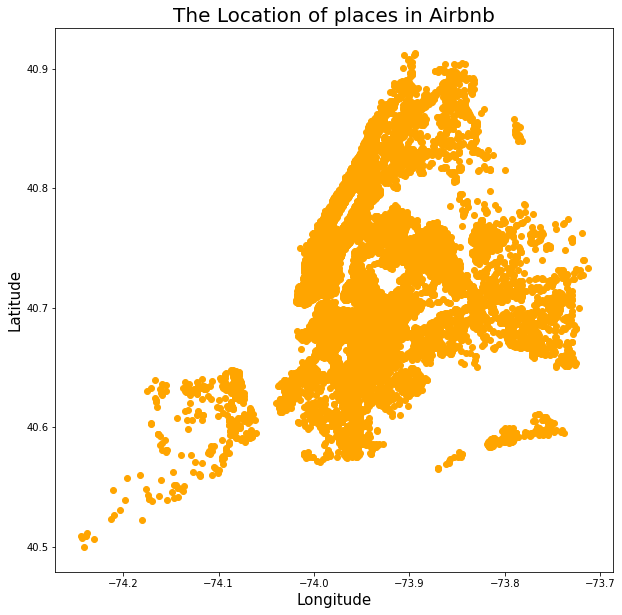

In [25]:
plt.figure(figsize = (10, 10))
plt.scatter(x = df['longitude'], y = df['latitude'], color = 'orange')
plt.xlabel("Longitude", fontsize = 15)
plt.ylabel("Latitude", fontsize = 15)
plt.title("The Location of places in Airbnb", fontsize = 20)
plt.show()

In [26]:
percentage_of_missing_values = np.round(sum(df['last_review'].isna()) / len(df['last_review']) * 100, 2)
print("The percentage of missing values for  'last_review' feature is: {}%".format(percentage_of_missing_values))

The percentage of missing values for  'last_review' feature is: 20.56%


In [27]:
percentage_of_missing_values = np.round(sum(df['reviews_per_month'].isna()) / len(df['reviews_per_month']) * 100, 2)
print("The percentage of missing values for 'reviews_per_month' feature is: {}%".format(percentage_of_missing_values))

The percentage of missing values for 'reviews_per_month' feature is: 20.56%


In [28]:
date_split = df['last_review'].iloc[0].split('-')

In [29]:
year_first_example = date_split[0]
month_first_example = date_split[1]
day_first_example = date_split[2]

In [30]:
year_first_example

'2018'

In [31]:
month_first_example

'10'

In [32]:
day_first_example

'19'

In [33]:
def date_splitter(data, feature):
    """
    Phân chia dữ liệu ở định dạng chuỗi đến năm, tháng và ngày tương ứng.
    Trả lại năm, tháng và ngày sau khi chia dữ liệu
    """
    year_list = []
    month_list = []
    day_list = []
    data_copy = data.copy()
    data_copy.dropna(inplace = True)
    for i in range(len(data_copy[feature])):
        data_split = data_copy[feature].iloc[i].split('-')
        year_list.append(data_split[0])
        month_list.append(data_split[1])
        day_list.append(data_split[2])
    return year_list, month_list, day_list

In [34]:
df_copy = df.copy()

In [35]:
years, months, days = date_splitter(df_copy, feature = 'last_review')

In [36]:
from statistics import mode

In [37]:
mode_years = mode(years)
mode_months = mode(months)
mode_days = mode(days)

In [38]:
mode_years

'2019'

In [39]:
mode_months 

'06'

In [40]:
mode_days

'01'

In [41]:
mode_date = mode_years + '-' + mode_months + '-' + mode_days
mode_date

'2019-06-01'

In [42]:
import numpy as np
from sklearn.impute import SimpleImputer

In [43]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


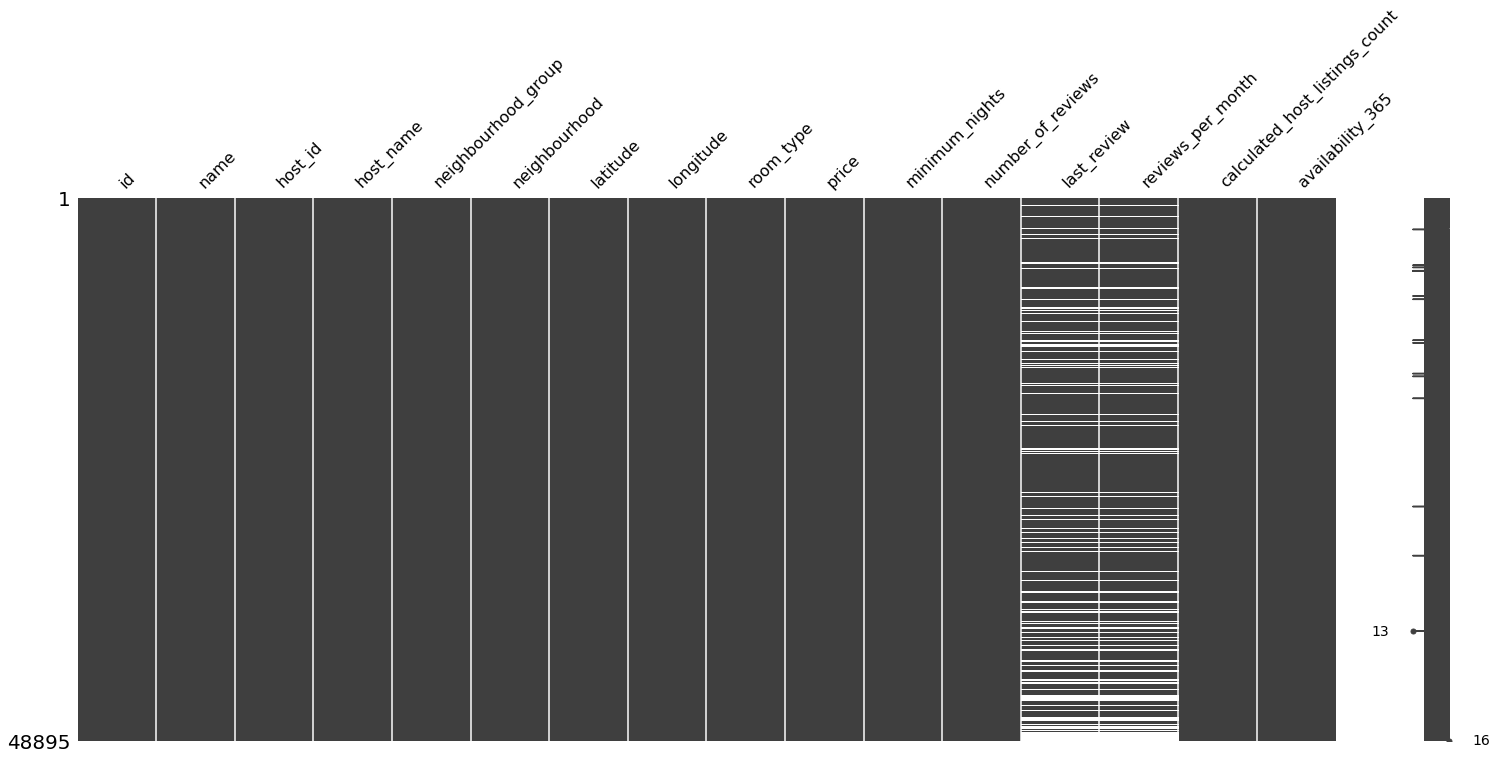

In [44]:
msno.matrix(df_copy)
plt.show()

In [45]:
df_copy['last_review'].fillna(mode_date, inplace = True) 

<AxesSubplot:>

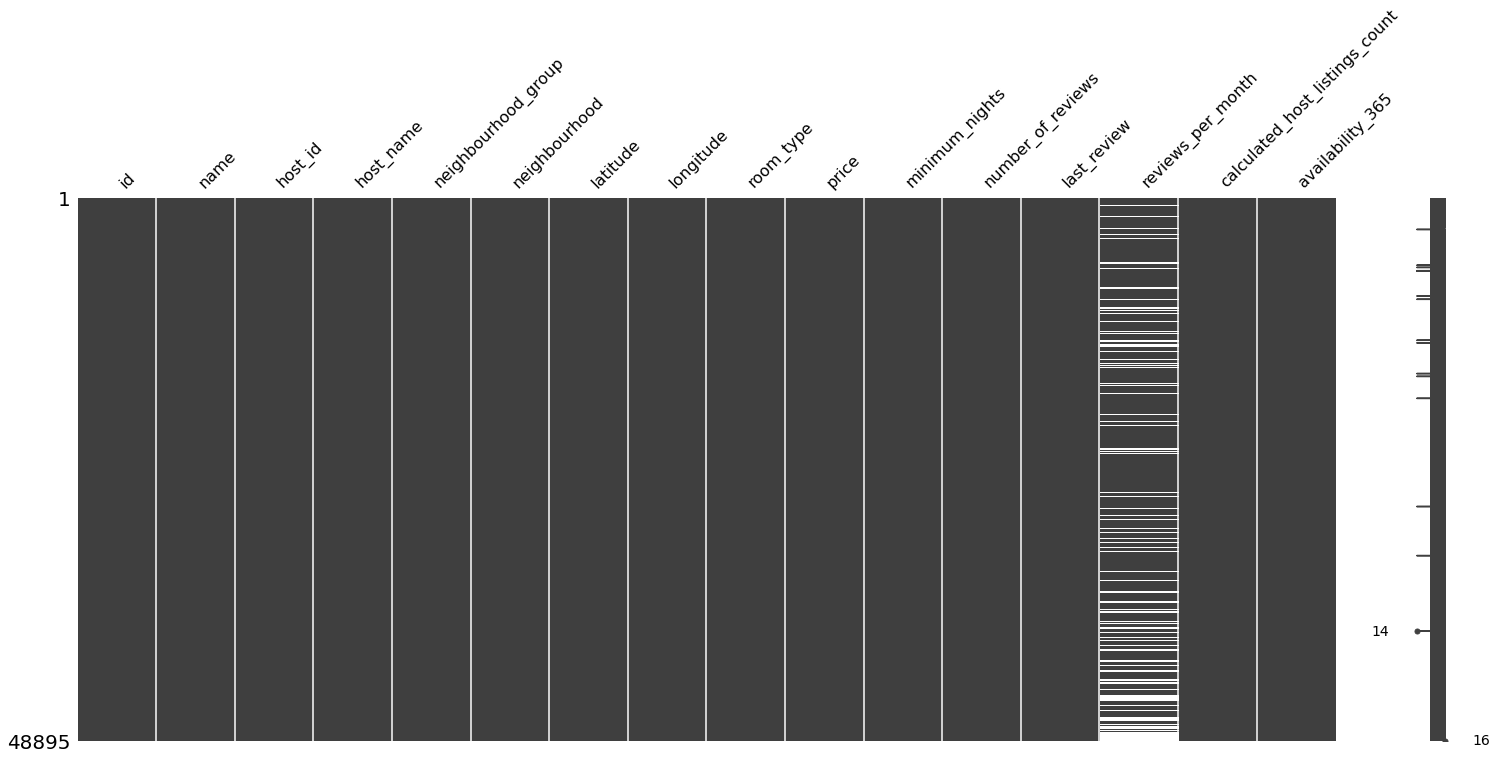

In [46]:
msno.matrix(df_copy)

In [47]:
def mean_or_median_finder(data, feature, mean_impute = True):
    temp_data = data.copy()
    temp_data.dropna(inplace = True)
    if mean_impute: 
        mean_of_series = np.mean(temp_data[feature])
        return temp_data, mean_of_series
    else:
        median_of_series = np.median(temp_data[feature])
        return temp_data, median_of_series


In [48]:
temp_data, mean_reviews = mean_or_median_finder(df_copy, feature = 'reviews_per_month', mean_impute = True)

In [49]:
temp_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


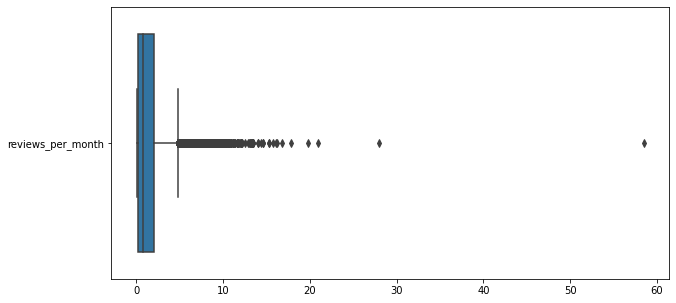

In [50]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = df[["reviews_per_month"]],orient='h')
plt.show()

In [51]:
temp_data, median_reviews = mean_or_median_finder(data = df_copy, feature = 'reviews_per_month', mean_impute = False)

In [52]:
median_reviews

0.72

In [53]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-01,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [54]:
df_copy['reviews_per_month'] = df_copy['reviews_per_month'].fillna(median_reviews)

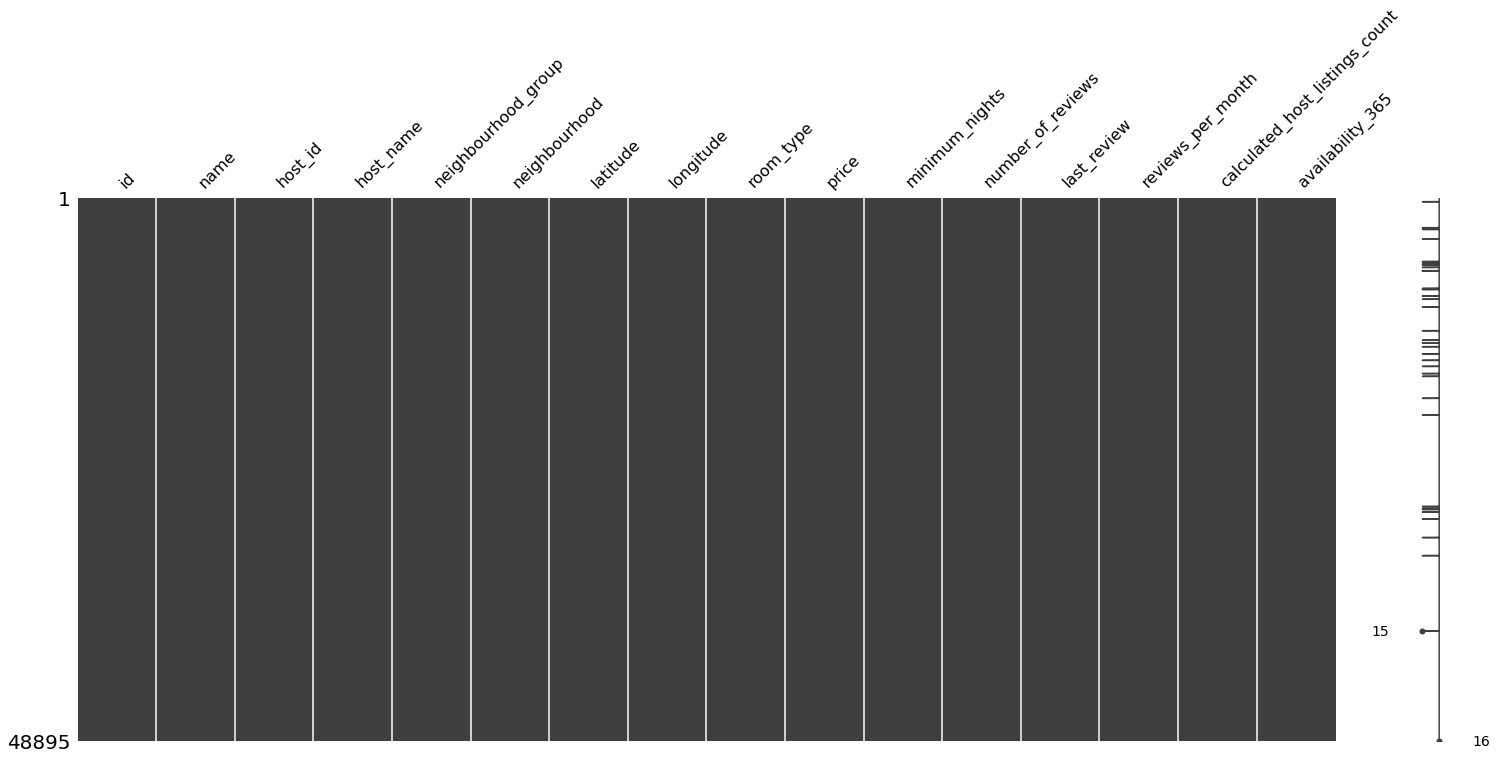

In [55]:
msno.matrix(df_copy)
plt.show()

In [56]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-01,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [57]:
df_copy['last_review_year'] = df_copy['last_review'].apply(lambda x: x[0: 4])
df_copy['last_review_month'] = df_copy['last_review'].apply(lambda x: x[5: 7])

In [58]:
df_copy['last_review_year']

0        2018
1        2019
2        2019
3        2019
4        2018
         ... 
48890    2019
48891    2019
48892    2019
48893    2019
48894    2019
Name: last_review_year, Length: 48895, dtype: object

In [59]:
df_copy['last_review_month']

0        10
1        05
2        06
3        07
4        11
         ..
48890    06
48891    06
48892    06
48893    06
48894    06
Name: last_review_month, Length: 48895, dtype: object

In [60]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,05
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-01,0.72,1,365,2019,06
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,07
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11


In [61]:
df_copy.drop('last_review', axis = 1, inplace = True)

In [62]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,05
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,2019,06
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,07
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11


In [63]:
len(df_copy['host_id'].unique())

37457

In [64]:
len(df_copy['id'].unique())

48895

In [65]:
df_copy['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

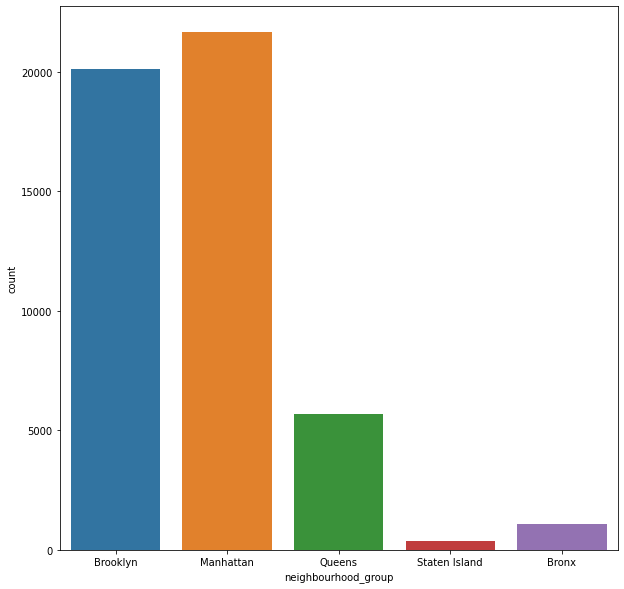

In [66]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'neighbourhood_group', data = df_copy)
plt.show()

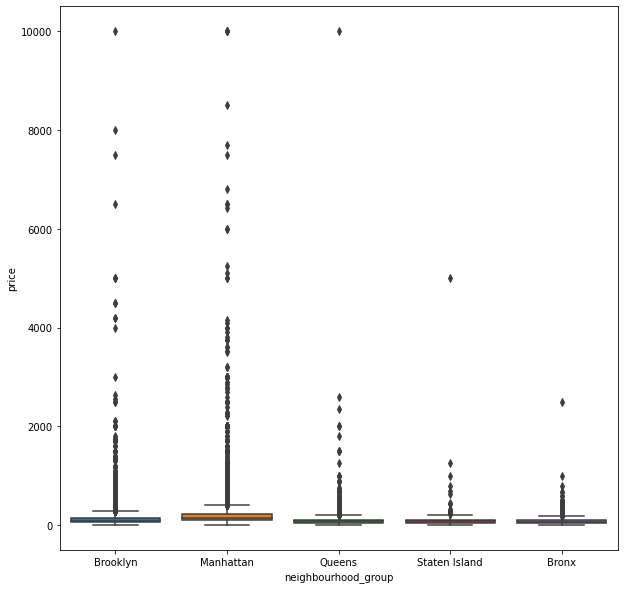

In [67]:
plt.figure(figsize = (10, 10))
sns.boxplot(x = 'neighbourhood_group', y = 'price', data = df_copy)
plt.show()

In [68]:
np.percentile(df_copy['price'], 50)

106.0

In [69]:
np.percentile(df_copy['price'], 99)

799.0

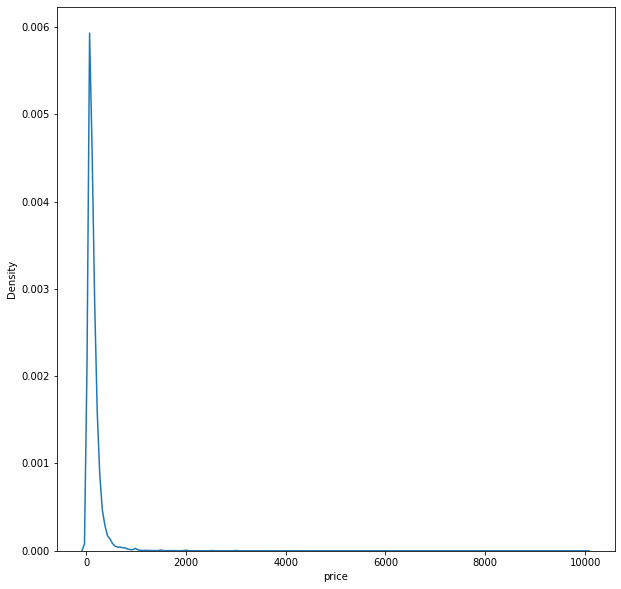

In [70]:
plt.figure(figsize = (10, 10))
sns.kdeplot(df_copy['price'])
plt.show()

In [71]:
len(df_copy['price'])

48895

In [72]:
def outliers_remover(data, feature, remove_outliers = True):
    """
    Đầu vào là 'data' và 'feature' để loại bỏ outliers.
    
    Trả về các ngoại lệ cùng với bộ dữ liệu với các ngoại lệ bị xóa nếu remove_outliers = true
    ngược lại trả về dữ liệu mà không xóa các ngoại lệ
    """
    
    temp_data = data.copy()
    if remove_outliers:
        outlier_points = np.percentile(df_copy[feature], 99)
        temp_data_outliers_removed = temp_data[temp_data[feature] < outlier_points]
        outliers = temp_data[temp_data[feature] > outlier_points]
        outliers_removed = len(outliers)
        print("Phần trăm dữ liệu ngoại lệ bị loại bỏ: {}%".format((outliers_removed) / len(temp_data) * 100))
        return outliers, temp_data_outliers_removed
    else:
        return temp_data
    

In [73]:
outliers, df_outliers_removed = outliers_remover(df_copy, feature = 'price')

Phần trăm dữ liệu ngoại lệ bị loại bỏ: 0.9694242765108907%


In [74]:
len(df_outliers_removed)

48403

In [75]:
len(outliers)

474

In [76]:
outliers.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7,2016,08
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,0.33,11,0,2018,05
662,250801,Heart & Soul of Greenwich Village,1314834,Rhona,Manhattan,Greenwich Village,40.73129,-73.99944,Entire home/apt,850,3,107,1.15,1,249,2019,05
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,0.31,4,297,2018,09
780,279857,#1 Yellow Block BnB/see at Net Flix Show Stay ...,1420300,Gordy,Brooklyn,Bedford-Stuyvesant,40.68492,-73.95489,Entire home/apt,800,4,122,1.37,1,257,2019,07


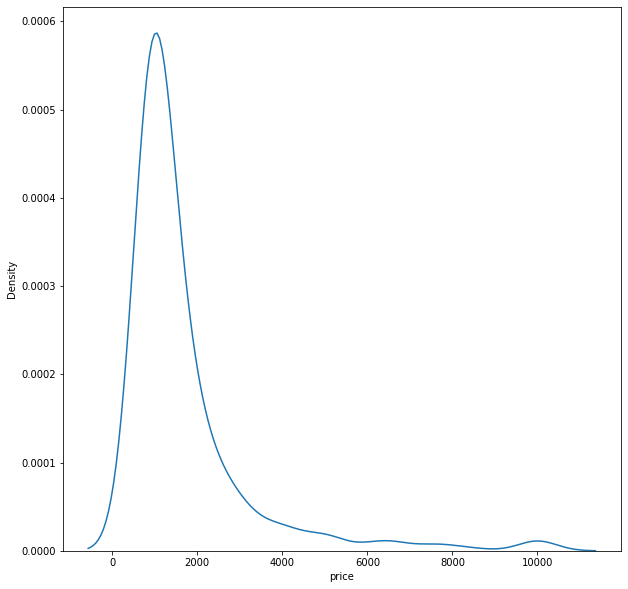

In [77]:
plt.figure(figsize = (10, 10))
sns.kdeplot(outliers['price'])
plt.show()

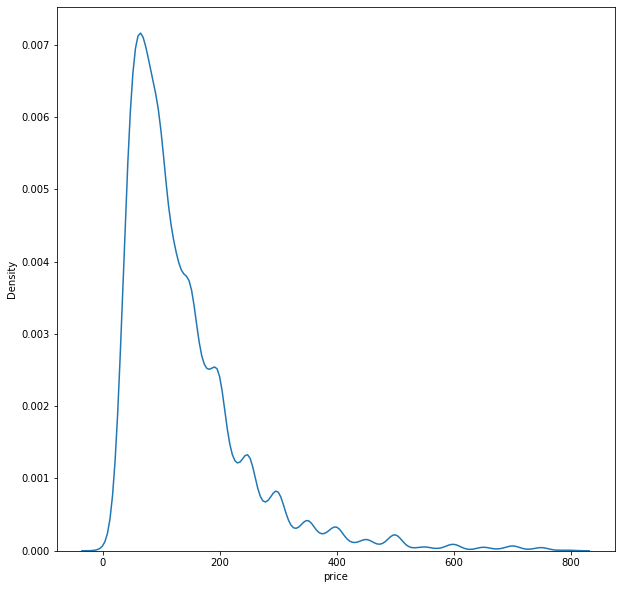

In [78]:
plt.figure(figsize = (10, 10))
sns.kdeplot(df_outliers_removed['price'])
plt.show()

In [79]:
df_copy = df_outliers_removed.copy()

In [80]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,05
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,2019,06
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,07
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11


In [81]:
df_copy.drop(['name', 'host_id', 'host_name', 'id'], axis = 1, inplace = True)

In [82]:
df_copy.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,05
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,2019,06
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,07
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11


In [83]:
df_copy.shape

(48403, 13)

In [84]:
df_copy = pd.get_dummies(df_copy, columns = ['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first = True)

# Decision Trees, Random Forests và Neural Networks

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X = df_copy.drop(['price'], axis = 1)

y = df_copy['price']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [88]:

X_train.shape

(38722, 234)

In [89]:
X_test.shape

(9681, 234)

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()

In [92]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
X_train_scaled[0: 5]

array([[-0.44860626,  0.17844211, -0.04765725, ..., -0.06984847,
        -0.92386441, -0.15695699],
       [-0.7909645 , -1.00203319,  1.17662428, ..., -0.06984847,
        -0.92386441, -0.15695699],
       [ 0.51872073, -0.42762484, -0.29251356, ..., -0.06984847,
         1.08240992, -0.15695699],
       [-0.29612122, -0.12188087, -0.29251356, ..., -0.06984847,
         1.08240992, -0.15695699],
       [ 1.93818785,  0.28664512, -0.29251356, ..., -0.06984847,
         1.08240992, -0.15695699]])

# Train Decision Tree Regressor

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 

In [95]:
model = GridSearchCV(estimator=DecisionTreeRegressor(),scoring='neg_mean_squared_error',
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [15, 25, 50],
                         'min_samples_split': [50, 100, 200]
                        }
            )
model.fit(X_train_scaled, y_train)
y_predictions = model.predict(X_test_scaled)

In [96]:
model.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=25, min_samples_split=50)

In [97]:
model.best_score_

-6459.6277215146065

In [98]:
plot_depth = 2
model = DecisionTreeRegressor(max_depth = plot_depth)
model.fit(X_train_scaled, y_train)
y_predictions = model.predict(X_test_scaled)

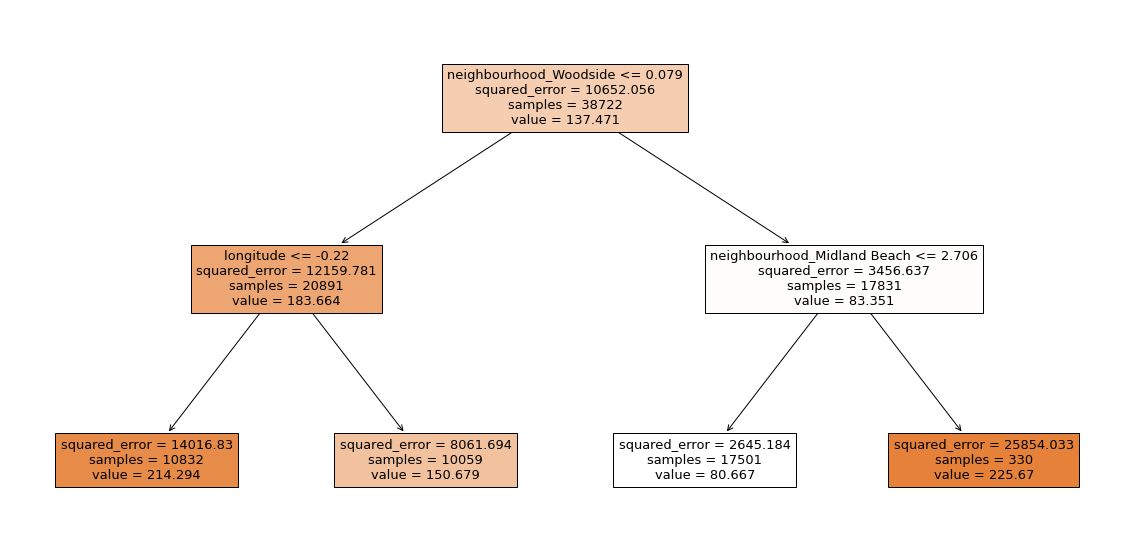

In [99]:
plt.figure(figsize = (20, 10))
tree.plot_tree(model, filled = True, feature_names = df_copy.columns)
plt.show()

# Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
y_predictions = model.predict(X_test_scaled)

In [102]:
mean_squared_error(y_predictions, y_test)

5452.341647690494

In [103]:
mean_absolute_error(y_predictions, y_test)

45.05816151912681

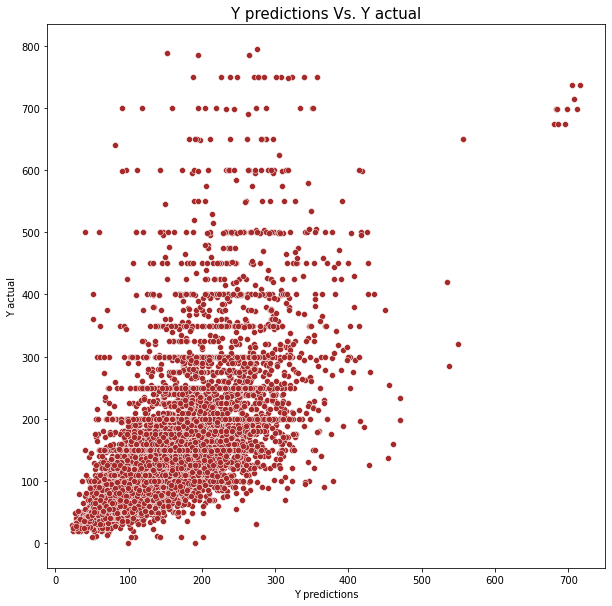

In [104]:
def scatterplot_function_evaluation(x_value, y_value, fig_size = (10, 10), color = 'green', font_size = 15):
    plt.figure(figsize = fig_size)
    sns.scatterplot(x_value, y_value, color = color)
    plt.title('Y predictions Vs. Y actual', fontsize = font_size)
    plt.xlabel('Y predictions')
    plt.ylabel('Y actual')
    plt.show()
scatterplot_function_evaluation(y_predictions, y_test, color = 'brown', )

# Gradient Boosting Regressor

Note: This model takes a long time to run. Feel free to take a look at the output. 


In [105]:
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
model = GradientBoostingRegressor()
model.fit(X_train_scaled, y_train)
y_predictions = model.predict(X_test_scaled)

In [107]:
mean_squared_error(y_predictions, y_test)

5693.89135843062

In [108]:
mean_absolute_error(y_predictions, y_test)

46.54385921232302

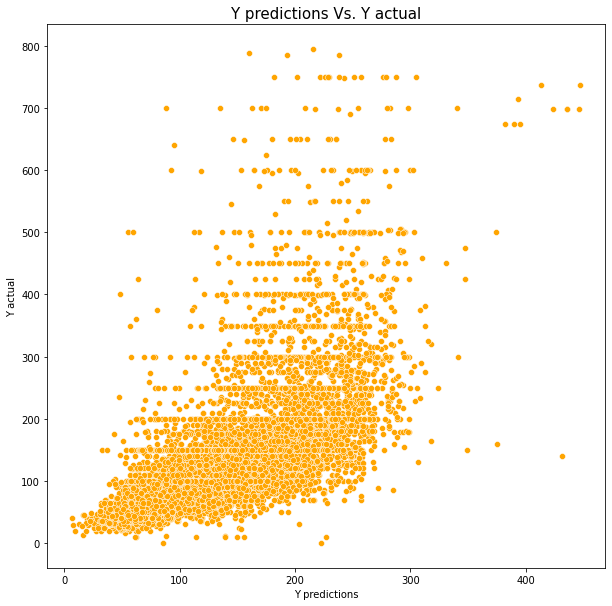

In [109]:
scatterplot_function_evaluation(y_predictions, y_test, color = 'orange')

# Neural Networks

In [110]:
from tensorflow.keras.layers import Dense, Dropout  ## Libraries from Keras which could be used for dropout and dense layers
from tensorflow.keras.models import Sequential  ## We would be using the sequential layers

2022-07-06 05:09:12.983826: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-06 05:09:12.983859: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [111]:
n_columns = len(X_train_scaled[0])

In [112]:
## Creating a sequential instance 
model = Sequential()

## Creating a hidden layer of size 100 and activation to be relu
model.add(Dense(100, activation = 'relu', input_shape = (n_columns,)))

## Creating a hidden layer of size 50 and activation to be relu 
model.add(Dense(50, activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))

## Creating a densely connected layer with one unit as the output and the activation is linear 
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

2022-07-06 05:09:14.502335: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-06 05:09:14.502378: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-06 05:09:14.502409: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-07-06 05:09:14.502734: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [113]:
model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
3873/3873 [==============================] - 6s 1ms/step - loss: 7024.7471 - mean_absolute_error: 52.2563
Epoch 2/10
3873/3873 [==============================] - 5s 1ms/step - loss: 6174.2705 - mean_absolute_error: 48.5509
Epoch 3/10
3873/3873 [==============================] - 5s 1ms/step - loss: 6098.6245 - mean_absolute_error: 48.2517
Epoch 4/10
3873/3873 [==============================] - 5s 1ms/step - loss: 6047.5659 - mean_absolute_error: 47.8779
Epoch 5/10
3873/3873 [==============================] - 5s 1ms/step - loss: 6029.1123 - mean_absolute_error: 47.7950
Epoch 6/10
3873/3873 [==============================] - 5s 1ms/step - loss: 5985.5459 - mean_absolute_error: 47.6156
Epoch 7/10
3873/3873 [==============================] - 5s 1ms/step - loss: 5973.9019 - mean_absolute_error: 47.5501
Epoch 8/10
3873/3873 [==============================] - 5s 1ms/step - loss: 5953.7070 - mean_absolute_error: 47.3907
Epoch 9/10
3873/3873 [==============================] - 5s 1ms/s

In [114]:
y_predictions = model.predict(X_test_scaled)

303/303 [==============================] - 0s 889us/step


In [115]:
mean_squared_error(y_predictions, y_test)

5961.670861156211

In [116]:
mean_absolute_error(y_predictions, y_test)

48.757946148377755

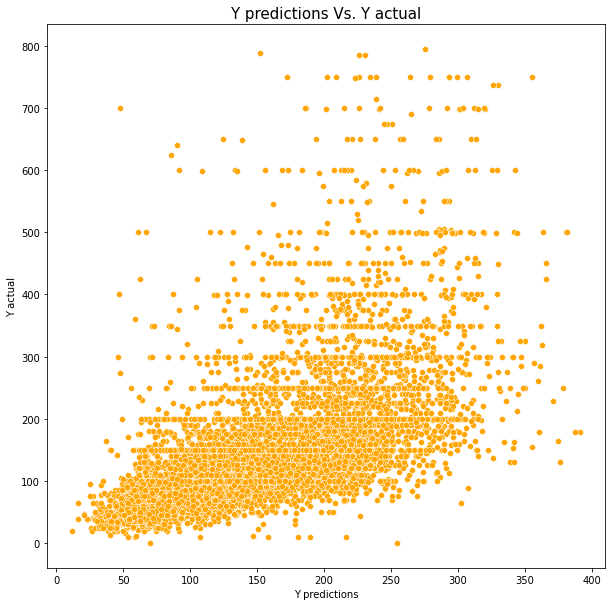

In [117]:
scatterplot_function_evaluation(y_predictions.flatten(), y_test, color = 'orange')

## Quan sát:
Có thể thấy dựa trên kết quả của các mô hình đã chọn thì __Random Forest__ đang hoạt động  tốt trên dữ liệu test với __mean_squared_error__: 5433.440817454316  và __mean_absolute_error__ 44.91042924038741